# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [5]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  1891k      0  0:00:48  0:00:48 --:--:-- 1539k
zsh:1: command not found: unzip
total 32
-rw-r--r-- 1 francois francois 21688 Jun 30 09:16 image_denoising.ipynb
-rw-r--r-- 1 francois francois   122 Jun 30 09:05 image_denoising.ipynb:Zone.Identifier
-rw-r--r-- 1 francois francois     0 Jun 29 09:31 README.md
drwxr-xr-x 2 francois francois  4096 Jun 29 09:31 tests


In [6]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Albrecht_Dua╠é┬ò┬áA╠â┬¬rer_295.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg',
 './paintings/Sandro_Botticelli_164.jpg',
 

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from PIL import Image
image_54 = Image.open(dataset_paths[53])

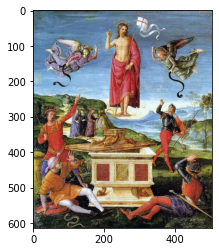

In [26]:
plt.imshow(image_54)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [29]:
image_54.size# YOUR CODE HERE

(505, 614)

In [30]:
img_shape = (505,614,3)
img_dim = 3

❓ **What was in the image above?**

In [31]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

#is_portrait = True
is_portrait = False

is_colored_image = True
#is_colored_image = False

In [32]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [120]:
dataset_images = []


In [121]:
len(dataset_paths)

1085

In [122]:
small_data = dataset_paths[0:100]
small_data

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Albrecht_Dua╠é┬ò┬áA╠â┬¬rer_295.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg',
 './paintings/Sandro_Botticelli_164.jpg',
 

In [123]:
for element in small_data:
    image = Image.open(element)
    image = np.array(image)
    dataset_images.append(image)

dataset_images[2]


   

array([[[236, 205, 176],
        [232, 201, 172],
        [233, 202, 173],
        ...,
        [219, 196, 182],
        [223, 194, 180],
        [221, 187, 175]],

       [[241, 209, 184],
        [236, 205, 177],
        [235, 204, 176],
        ...,
        [216, 193, 179],
        [220, 191, 177],
        [219, 185, 173]],

       [[243, 211, 190],
        [238, 206, 183],
        [236, 204, 181],
        ...,
        [223, 200, 186],
        [227, 198, 184],
        [225, 191, 179]],

       ...,

       [[216, 167, 111],
        [230, 177, 107],
        [212, 158,  72],
        ...,
        [223, 196, 177],
        [220, 188, 165],
        [216, 180, 154]],

       [[217, 167, 114],
        [219, 165,  95],
        [205, 149,  64],
        ...,
        [224, 197, 180],
        [223, 191, 170],
        [220, 184, 158]],

       [[242, 192, 143],
        [224, 171, 105],
        [203, 147,  62],
        ...,
        [225, 198, 181],
        [224, 192, 171],
        [224, 186, 163]]

In [124]:
type(dataset_images[4])

numpy.ndarray

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [125]:

"all images don't have the same dimensions "
"it is because some of the paintaings are in black and white so they just have 2 dimensions"
"they don't need a third dimension for the color" 

"they don't need a third dimension for the color"

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [126]:
from tqdm import tqdm
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 100/100 [00:00<00:00, 692.64it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [127]:
from tensorflow import image

In [128]:
import tensorflow as tf

In [129]:
tmp = []
for image in dataset_images:
    image = tf.image.resize(image, (120,100))
    image = np.array(image)
    tmp.append(image)



In [130]:
dataset_resized = tmp
dataset_resized[9].shape

(120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [131]:
dataset_scaled = []
for image in dataset_resized:
    image = image/255
    dataset_scaled.append(image)

dataset_scaled[4]

array([[[0.674203  , 0.6730603 , 0.67034364],
        [0.76417065, 0.7683402 , 0.735625  ],
        [0.7579232 , 0.7263603 , 0.7101071 ],
        ...,
        [0.76049304, 0.7729441 , 0.777944  ],
        [0.7250461 , 0.7871442 , 0.7890851 ],
        [0.66996765, 0.6943597 , 0.65557534]],

       [[0.7088716 , 0.6926917 , 0.6588784 ],
        [0.68522155, 0.6811544 , 0.6667137 ],
        [0.7342623 , 0.69681126, 0.7194927 ],
        ...,
        [0.7178461 , 0.7390569 , 0.73797846],
        [0.6379812 , 0.7085694 , 0.71641254],
        [0.6907138 , 0.7155995 , 0.69907933]],

       [[0.7458137 , 0.7421258 , 0.7226168 ],
        [0.7518031 , 0.7674894 , 0.77625245],
        [0.657353  , 0.66420764, 0.659612  ],
        ...,
        [0.73182225, 0.76338685, 0.7505438 ],
        [0.6698774 , 0.7450342 , 0.7587795 ],
        [0.70088625, 0.7368274 , 0.73312145]],

       ...,

       [[0.7322754 , 0.685648  , 0.53717655],
        [0.49592498, 0.4577607 , 0.35636908],
        [0.7823629 , 0

In [133]:
dataset_scaled = np.array(dataset_scaled)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [134]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(100, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

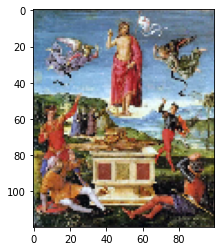

In [138]:
plt.imshow(dataset_scaled[53])

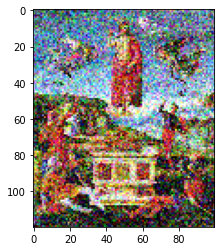

In [137]:
plt.imshow(dataset_noisy[53])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [238]:
from sklearn.model_selection import train_test_split
X = dataset_noisy
Y = dataset_scaled

# Split into Train/Test
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

In [239]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [240]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [241]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [242]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY



In [264]:
encoder = Sequential(name='encoder')
encoder.add(layers.Conv2D(16, (3,2), input_shape=(120, 100, 3), padding='same', activation="relu"))
encoder.add(layers.MaxPool2D(pool_size=(4,1)))

#encoder.add(layers.Conv2D(32, (3,3), padding='same', activation="relu"))
encoder.add(layers.MaxPool2D(pool_size=(2,4))) 

encoder.add(layers.Flatten())
encoder.add(layers.Dense(latent_dimensions, activation='tanh'))


encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 120, 100, 16)      304       
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 30, 100, 16)       0         
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 15, 25, 16)        0         
_________________________________________________________________
flatten_85 (Flatten)         (None, 6000)              0         
_________________________________________________________________
dense (Dense)                (None, 6000)              36006000  
Total params: 36,006,304
Trainable params: 36,006,304
Non-trainable params: 0
_________________________________________________________________


👉 **Test your encoder below**

In [265]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              36006304  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 36,012,979
Trainable params: 36,012,979
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [266]:
score_baseline= abs(Y_test - X_test)

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [267]:
autoencoder.compile(loss='mse',
              optimizer='adam')

In [268]:


history = autoencoder.fit(X_train, Y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.3)

Epoch 1/10
4/4 [==============================] - 112s 26s/step - loss: 0.0753 - val_loss: 0.0625
Epoch 2/10
4/4 [==============================] - 91s 26s/step - loss: 0.0713 - val_loss: 0.0623
Epoch 3/10
4/4 [==============================] - 113s 32s/step - loss: 0.0778 - val_loss: 0.0621
Epoch 4/10
4/4 [==============================] - 131s 36s/step - loss: 0.0749 - val_loss: 0.0623
Epoch 5/10
4/4 [==============================] - 128s 34s/step - loss: 0.0712 - val_loss: 0.0616
Epoch 6/10
4/4 [==============================] - 153s 41s/step - loss: 0.0766 - val_loss: 0.0598
Epoch 7/10
4/4 [==============================] - 178s 46s/step - loss: 0.0699 - val_loss: 0.0585
Epoch 8/10
4/4 [==============================] - 178s 50s/step - loss: 0.0618 - val_loss: 0.0549
Epoch 9/10
4/4 [==============================] - 177s 45s/step - loss: 0.0635 - val_loss: 0.0536
Epoch 10/10
4/4 [==============================] - 185s 47s/step - loss: 0.0507 - val_loss: 0.0498


❓ **Plot your training and validation loss at each epoch using the cell below**

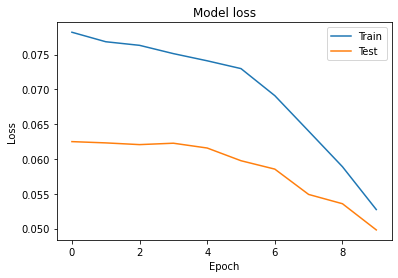

<Figure size 432x288 with 0 Axes>

In [269]:
# Plot below your train/val loss history
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()


plot_loss_accuracy(history)


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [270]:
Y_pred = autoencoder.predict(X_train, verbose=0, batch_size=100)# you can now display an image to see it is reconstructed well



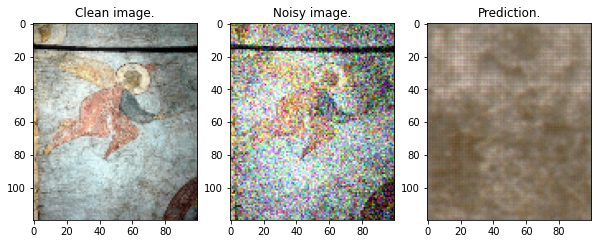

In [271]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

In [275]:
score_test = autoencoder.evaluate(X_test, y_test, verbose=0)

🧪 **Send your results below**

In [276]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()